# CSV_datasets_creation

In [1]:
#                                                   LIBRARIES

import os

# Image preprocesssing- processing
import cv2
import numpy as np

# images
from matplotlib import pyplot as plt

import math
import random

In [2]:
# Paths
DATASETS_FOLDER = "../../datasets/mnist/"
OUTPUT_FOLDER = "../../csv/"

In [3]:
# Train/Val/Test ratios
DATASET_RATIOS = [0.8,0.15,0.05] 

assert np.sum(DATASET_RATIOS) == 1, "Las proporciones no suman 1"

In [4]:
DATASETS_FOLDER = os.path.abspath(DATASETS_FOLDER) + os.sep
OUTPUT_FOLDER = os.path.abspath(OUTPUT_FOLDER) + os.sep

DATASETS_FOLDER = DATASETS_FOLDER.replace("\\","/")
OUTPUT_FOLDER   = OUTPUT_FOLDER.replace("\\","/")

In [5]:
DATASETS_FOLDER

'/media/manuel/Extreme SSD/00 IMPORTANTE/Dropbox_Total/Dropbox_Almacen/Estudios/20221009 Alba/Animal_Recognition_Neural_Network-master/datasets/mnist/'

In [6]:
ROOT_DATASETS_FOLDER = DATASETS_FOLDER.split("/")[-2]

TRAIN_CSV_NAME = OUTPUT_FOLDER + ROOT_DATASETS_FOLDER + '_train.csv'
VAL_CSV_NAME   = OUTPUT_FOLDER + ROOT_DATASETS_FOLDER + '_val.csv'
TEST_CSV_NAME  = OUTPUT_FOLDER + ROOT_DATASETS_FOLDER + '_test.csv'

print(TRAIN_CSV_NAME)


# other variables
IMG_EXTENSIONS = ['jpg','JPG','png','PNG']

N_IMAGES_TO_SHOW = 4



/media/manuel/Extreme SSD/00 IMPORTANTE/Dropbox_Total/Dropbox_Almacen/Estudios/20221009 Alba/Animal_Recognition_Neural_Network-master/csv/mnist_train.csv


In [7]:
# TO-DO Al correr el notebook verificar que no existen test, train y val (csvs)

In [8]:

#                                       getFilesWithAbsolutePath(path, ext = '')

# Dado un directorio devuelve una lista con el path absoluto de todos los ficheros con extensión ext

def getFilesWithAbsolutePath(path, ext = ''):
    # to store files in a list
    list = []

    if bool(ext):
        ext = '.' + ext

    # dirs=directories
    for (root, folder, files) in os.walk(path):
        for file in files:
            filePath = os.path.abspath(os.path.join(root, file))
            if ext in filePath:
                list.append(filePath)
                #print(filePath)

    return list

#lista = getFilesWithAbsolutePath(mypath, ext='pdf')
#print(len(lista), lista[:3])


#                            getFilesWithAbsolutePathListaExtensiones(path, extList = [''])

# Dado un directorio devuelve una lista con el path absoluto de
# todos los ficheros con extensión en extList

def getFilesWithAbsolutePathListaExtensiones(path, extList = IMG_EXTENSIONS):
    # to store files in a list
    l_list = []

    if len(extList) == 0:
        extList = ['']

    for ext in extList:
        l_list += getFilesWithAbsolutePath(path, ext)

    return l_list

In [9]:
def read_csv(input_csv):
    imgs_relative_path , labels = np.loadtxt(input_csv,dtype=str,
                                     delimiter=',', usecols=(0, 1), unpack=True)
    return imgs_relative_path, labels

def write_array_to_csv(csvarray, output_csv):
    try:
        np.savetxt(output_csv, csvarray, delimiter=",",fmt='%s')
        print()
        print('CSV salvado: ', output_csv)
    except:
        print('ERROR ESCRITURA FINAL CSV:', output_csv)
        
        

In [10]:
# TO-DO 1: reparto de imagenes sea haga por clases para que salgan balanceadas (respecto al num original de imgs) y no con el total de imagenes de todas las clases

In [11]:
def read_imgs_to_array(path_dataset = DATASETS_FOLDER, ext_list = IMG_EXTENSIONS):
    imgs_list = getFilesWithAbsolutePathListaExtensiones(path_dataset, ext_list)
    csvArray = np.empty([len(imgs_list), 2], dtype=object)

    labels = os.listdir(DATASETS_FOLDER)

    aux = 0
    for idx, label in enumerate(labels):

        label_imgs_list = getFilesWithAbsolutePathListaExtensiones(path_dataset + label, ext_list)

        lista_aux = [ROOT_DATASETS_FOLDER + os.sep + item.split(os.sep + ROOT_DATASETS_FOLDER + os.sep)[-1] for item in label_imgs_list]
        csvArray[aux: aux + len(label_imgs_list),0] = lista_aux
        csvArray[aux: aux + len(label_imgs_list),1] = label
        aux += len(label_imgs_list)
        
    return csvArray


def dict_to_array(dictionary):
    labels = list(dictionary.keys())

    n_elements = 0

    for label in labels:
        n_elements += len(dictionary[label])

    csvArray = np.empty([n_elements + 1, 2], dtype=object)

    csvArray[0,0] = "path"
    csvArray[0,1] = "class"

    aux = 1
    for label in labels:
        label_imgs_list = list(dictionary[label])
        csvArray[aux: aux + len(label_imgs_list),0] = label_imgs_list
        csvArray[aux: aux + len(label_imgs_list),1] = label
        aux += len(label_imgs_list)
        
    return csvArray

In [12]:
def create_TrainValTest_dicts_from_array(csvArray):
    imgs_path = csvArray[:,0]
    labels = csvArray[:,1]

    unique_labels = np.unique(labels)

    assert len(labels) == len(imgs_path)

    classesDict = {}
    for label in unique_labels:
        classesDict[label] = []

    # Unimos los paths de una misma clase en una lista
    for idx, label in enumerate(labels):
        img_path_standard = imgs_path[idx].replace("\\","/")
        classesDict[label].append(img_path_standard)


    train_dict = {}
    val_dict = {}
    test_dict = {}

    # Repartimos Los paths proporcionalmente a la ratio pedida y los metemos en los arrays correspondientes  
    for label in unique_labels:
        print(label)
        train_dict[label] = []
        val_dict[label]   = []
        test_dict[label]  = []
        cuantos = [0,0,0] # elementos que irán a train, val y test.
        lista = list(classesDict[label])
        n_class_elements = int(len(lista))

        cuantos[1] = int(np.ceil(n_class_elements*DATASET_RATIOS[1]))
        cuantos[2] = int(np.ceil(n_class_elements*DATASET_RATIOS[2]))
        cuantos[0] = int(n_class_elements-cuantos[2]-cuantos[1])

        print('      [Train, Val, Test] =', cuantos)
        indices = list(range(n_class_elements))
        random.shuffle(indices)

        for idx in range(0, cuantos[0]):
            train_dict[label].append(lista[indices[idx]])
        for idx in range(cuantos[0],cuantos[0]+cuantos[1]):
            val_dict[label].append(lista[indices[idx]])
        for idx in range(cuantos[0]+cuantos[1],cuantos[0]+cuantos[1]+cuantos[2]):
            test_dict[label].append(lista[indices[idx]])

    return train_dict, val_dict, test_dict

In [13]:
csvArray = read_imgs_to_array()

train_dict, val_dict, test_dict = create_TrainValTest_dicts_from_array(csvArray)

train_array = dict_to_array(train_dict)

val_array   = dict_to_array(val_dict )
test_array  = dict_to_array(test_dict )

write_array_to_csv(train_array, TRAIN_CSV_NAME)
write_array_to_csv(  val_array,   VAL_CSV_NAME)
write_array_to_csv( test_array,  TEST_CSV_NAME)

0
      [Train, Val, Test] = [3305, 620, 207]
1
      [Train, Val, Test] = [3746, 703, 235]
2
      [Train, Val, Test] = [3341, 627, 209]
3
      [Train, Val, Test] = [3480, 653, 218]
4
      [Train, Val, Test] = [3257, 611, 204]
5
      [Train, Val, Test] = [3035, 570, 190]
6
      [Train, Val, Test] = [3309, 621, 207]
7
      [Train, Val, Test] = [3519, 661, 221]
8
      [Train, Val, Test] = [3249, 610, 204]
9
      [Train, Val, Test] = [3349, 629, 210]

CSV salvado:  /media/manuel/Extreme SSD/00 IMPORTANTE/Dropbox_Total/Dropbox_Almacen/Estudios/20221009 Alba/Animal_Recognition_Neural_Network-master/csv/mnist_train.csv

CSV salvado:  /media/manuel/Extreme SSD/00 IMPORTANTE/Dropbox_Total/Dropbox_Almacen/Estudios/20221009 Alba/Animal_Recognition_Neural_Network-master/csv/mnist_val.csv

CSV salvado:  /media/manuel/Extreme SSD/00 IMPORTANTE/Dropbox_Total/Dropbox_Almacen/Estudios/20221009 Alba/Animal_Recognition_Neural_Network-master/csv/mnist_test.csv


In [14]:
def visualizacion():
    # create initial min values
    min_train = float('inf')
    min_test = float('inf')
    min_val = float('inf')

    # for table formatting
    separator = '\t\t' + "|" + '\t\t'
    separator_table = '\t\t' + "|" + '\t\t\t'
    horizontal = "-----------------------------------------------------------------------------"

    # header or table
    print("\t" + separator + "train" + separator + "test" + separator + "validation")
    print(horizontal)

    # print each label data
    for label in list(np.unique(csvArray[:,1])):
        # number of instances for current label for train, test and val
        n_train = len(train_dict[label])
        n_test = len(test_dict[label])
        n_validation = len(val_dict[label])

        # set new min if necessary
        if n_train < min_train: min_train = n_train
        if n_test < min_test: min_test = n_test
        if n_validation < min_val: min_val = n_validation

        print(label + separator_table + str(n_train) + separator_table + str(n_test) + separator_table + str(n_validation))

In [15]:
visualizacion()

			|		train		|		test		|		validation
-----------------------------------------------------------------------------
0		|			3305		|			207		|			620
1		|			3746		|			235		|			703
2		|			3341		|			209		|			627
3		|			3480		|			218		|			653
4		|			3257		|			204		|			611
5		|			3035		|			190		|			570
6		|			3309		|			207		|			621
7		|			3519		|			221		|			661
8		|			3249		|			204		|			610
9		|			3349		|			210		|			629


In [16]:
# function to take a sample of n_samples from dataset_array and do some tests
def sample(dataset_array, n_samples = N_IMAGES_TO_SHOW):
    num_rows = 32

    random_index = np.random.choice(num_rows, size=n_samples, replace=False)

    if 0 in random_index:
        for idx, item in enumerate(random_index):
            random_index[idx] += 1

    sample = dataset_array[random_index,:] #[random_index, :]

    for idx, img in enumerate(sample):
        sample[idx,0] = "../../datasets/" + img[0]
    # print(sample)
    return sample

def show_sample(sample_data, n_samples = N_IMAGES_TO_SHOW):
    sample_imgs = sample_data[:, 0]
    sample_labels = sample_data[:, 1]

    sqrt_N_SAMPLES = int(math.sqrt(n_samples))

    r, c = sqrt_N_SAMPLES, sqrt_N_SAMPLES
    fig = plt.figure(figsize=(2*c, 2*r))
    for _r in range(r):
        for _c in range(c):
            ix = _r*c + _c
            ax = plt.subplot(r, c, ix + 1)
            img, label = sample_imgs[ix], sample_labels[ix]
            img = cv2.imread(os.path.abspath(img))
            # TO-DO Las imagenes salen con un color raro
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.axis("off")
            ax.imshow(img, cmap="gray", interpolation='bicubic')
            ax.set_title(label)
    plt.tight_layout()
    plt.show()

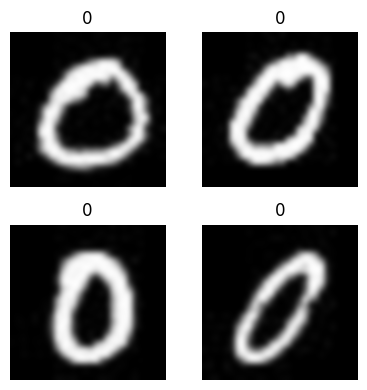

In [17]:
sample_dataset = sample(dataset_array = train_array, n_samples=4)
show_sample(sample_dataset)
sample_imgs = sample_dataset[:, 0]
sample_labels = sample_dataset[:, 1]